In [2]:
#Prepare Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors


### Prepare & View Dataset

For current project, two datasets from different subscription services (Netflix and Disney+) will be chosen, also providing IMDB dataset which also provides ratings for movies

In [3]:
disney_data = pd.read_csv("disney_plus_titles.csv")
netflix_data = pd.read_csv("netflix_titles.csv")
amazon_data = pd.read_csv("amazon_prime_titles.csv")
imdb_data = pd.read_csv("imdb_movies.csv")

In [4]:
disney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [7]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [8]:
disney_data.set_index("show_id").sample(5)

type                          title        director  \
show_id                                                           
s556     TV Show            Tangled: The Series             NaN   
s551       Movie                    Water Birds  Ben Sharpsteen   
s658       Movie                 Drain Alcatraz    Wayne Abbott   
s558     TV Show                    Brain Games             NaN   
s791     TV Show  Chip 'n Dale's Rescue Rangers             NaN   

                                                      cast  \
show_id                                                      
s556     Zachary Levi, Mandy Moore, Eden Espinosa, Clan...   
s551                                        Winston Hibler   
s658                        Craig Sechler, Russell Boulter   
s558                                           Neil Harris   
s791     Corey Burton, Peter Cullen, Jim Cummings, Tres...   

                                                   country         date_added  \
show_id                                                                         
s556                                         United States     April 23, 2020   
s551                                         United States        May 1, 2020   
s658                                         United States    January 1, 2020   
s558                                         United States     April 17, 2020   
s791     United States, Taiwan, South Korea, China, Jap...  November 12, 2019   

         release_year rating   duration  \
show_id                                   
s556             2016  TV-Y7  3 Seasons   
s551             1952   TV-G     31 min   
s658             2017  TV-PG     47 min   
s558             2011   TV-G  8 Seasons   
s791             1989   TV-G   1 Season   

                                           listed_in  \
show_id                                                
s556             Action-Adventure, Animation, Comedy   
s551           Animals & Nature, Documentary, Family   
s658                                     Documentary   
s558     Docuseries, Family, Game Show / Competition   
s791             Action-Adventure, Animation, Comedy   

                                               description  
show_id                                                     
s556        Rapunzel must discover the secret of her hair.  
s551     Experience the beauty and variety of majestic ...  
s658     Draining the waters around Alcatraz reveals th...  
s558     Brain Games features games & experiments revea...  
s791     Chip and Dale head a small group of animal cha...

In [9]:
netflix_data.set_index("show_id").sample(5)

type                                            title  \
show_id                                                             
s2209      Movie  Dragons: Rescue Riders: Secrets of the Songwing   
s4470    TV Show                           Fate/EXTRA Last Encore   
s4497      Movie                               Naa Bangaaru Talli   
s5535      Movie                                            Macho   
s7730    TV Show                               Person of Interest   

                         director  \
show_id                             
s2209    Greg Rankin, TJ Sullivan   
s4470                         NaN   
s4497           Rajesh Touchriver   
s5535             Antonio Serrano   
s7730                         NaN   

                                                      cast        country  \
show_id                                                                     
s2209    Noah Kaye Bentley, Brennley Brown, Zach Callis...  United States   
s4470    Atsushi Abe, Sakura Tange, Kana Ueda, Hiroshi ...          Japan   
s4497    Siddique, Anjali Patil, Lakshmi Menon, Nina Ku...          India   
s5535    Miguel Rodarte, Cecilia Suárez, Aislinn Derbez...         Mexico   
s7730    Jim Caviezel, Michael Emerson, Taraji P. Henso...  United States   

                  date_added  release_year rating   duration  \
show_id                                                        
s2209          July 24, 2020          2020   TV-Y     46 min   
s4470       October 30, 2018          2018  TV-MA  2 Seasons   
s4497       October 19, 2018          2013  TV-14    122 min   
s5535         April 12, 2017          2016  TV-MA    101 min   
s7730     September 22, 2016          2016  TV-14  5 Seasons   

                                                listed_in  \
show_id                                                     
s2209                  Children & Family Movies, Comedies   
s4470                Anime Series, International TV Shows   
s4497                        Dramas, International Movies   
s5535        Comedies, International Movies, LGBTQ Movies   
s7730    Crime TV Shows, TV Action & Adventure, TV Dramas   

                                               description  
show_id                                                     
s2209    When a musical dragon with a beautiful voice h...  
s4470    Hakuno Kishinami finds himself in the midst of...  
s4497    A father leading a dark double life and his da...  
s5535    A famous designer who's always pretended to be...  
s7730    Ex-CIA agent John Reese and enigmatic billiona...

In [10]:
amazon_data.set_index("show_id").sample(5)

type                             title  \
show_id                                              
s2102      Movie          Inside Italy's COVID War   
s3182      Movie  Baby Pirates - The Golden Statue   
s1160    TV Show                Rick Stein's India   
s5722      Movie                          Evil Eye   
s862       Movie          Sunrise on the Bosphorus   

                             director  \
show_id                                 
s2102            Sasha Joelle Achilli   
s3182                   Robert Rhodin   
s1160                             NaN   
s5722    Elan Dassani, Rajeev Dassani   
s862                      Mark Knight   

                                                      cast        country  \
show_id                                                                     
s2102                                                  NaN            NaN   
s3182                                      Johan Hallström            NaN   
s1160                                           Rick Stein            NaN   
s5722    Sunita Mani, Omar Maskati, Sarita Choudhury, B...  United States   
s862                                                   NaN            NaN   

        date_added  release_year rating  duration  \
show_id                                             
s2102          NaN          2020    NaN    53 min   
s3182          NaN          2016      G    12 min   
s1160          NaN          2013    13+  1 Season   
s5722          NaN          2020    16+    89 min   
s862           NaN          2019    ALL    30 min   

                             listed_in  \
show_id                                  
s2102    Documentary, Special Interest   
s3182                  Animation, Kids   
s1160                 Special Interest   
s5722                    Drama, Horror   
s862     Documentary, Special Interest   

                                               description  
show_id                                                     
s2102    Inside a hospital battling COVID-19 in Norther...  
s3182    Avi, Mike, Nina and Xu are ordinary city babie...  
s1160    Intrepid chef Rick Stein embarks on a spectacu...  
s5722    Welcome to the Blumhouse! A superstitious moth...  
s862     Relax with a beautiful sunrise over the Bospho...

In [11]:
imdb_data.sample(4)

names       date_x  score  \
4815  Dennis the Menace  06/24/1993    58.0   
7731     Coogan's Bluff  10/02/1968    63.0   
7035       The Fountain  01/25/2007    69.0   
2263      Don't Breathe  06/08/2016    70.0   

                                           genre  \
4815                              Family, Comedy   
7731              Action, Crime, Drama, Thriller   
7035  Drama, Adventure, Science Fiction, Romance   
2263                            Thriller, Horror   

                                               overview  \
4815  Mr. Wilson's ever-present annoyance comes in t...   
7731  Coogan, an Arizona deputy sheriff goes to New ...   
7035  Spanning over one thousand years, and three pa...   
2263  A group of teens break into a blind man's home...   

                                                   crew         orig_title  \
4815  Walter Matthau, George Wilson, Mason Gamble, D...  Dennis the Menace   
7731  Clint Eastwood, Coogan, Lee J. Cobb, Lt. McElr...     Coogan's Bluff   
7035  Hugh Jackman, Tomás / Tom Creo / Tommy, Rachel...       The Fountain   
2263  Stephen Lang, The Blind Man, Jane Levy, Rocky,...      Don't Breathe   

         status orig_lang    budget_x      revenue country  
4815   Released   English  35000000.0  117270765.0      AU  
7731   Released   English   7338225.8    3110000.0      US  
7035   Released   English  35000000.0   15461638.0      AU  
2263   Released   English   9900000.0  159047649.0      AU

### Data Cleaning / Data Picking

Due to imdb dataset only counts for movies, so filter subscription dataset for movies only and pick columns relevant to movie ratings

In [12]:
netflix_movies = netflix_data[(netflix_data["type"]=="Movie")]
filter_column = ["show_id","title","release_year","duration","director","country"]
netflix_movies = netflix_movies.loc[:,filter_column]
netflix_movies.rename(columns={"description":"netflix_description","show_id":"netflix_id"},inplace=True)
netflix_movies.set_index("netflix_id")


title  release_year duration  \
netflix_id                                                            
s1                      Dick Johnson Is Dead          2020   90 min   
s7          My Little Pony: A New Generation          2021   91 min   
s8                                   Sankofa          1993  125 min   
s10                             The Starling          2021  104 min   
s13                             Je Suis Karl          2021  127 min   
...                                      ...           ...      ...   
s8802                                Zinzana          2015   96 min   
s8803                                 Zodiac          2007  158 min   
s8805                             Zombieland          2009   88 min   
s8806                                   Zoom          2006   88 min   
s8807                                 Zubaan          2015  111 min   

                                 director  \
netflix_id                                  
s1                        Kirsten Johnson   
s7          Robert Cullen, José Luis Ucha   
s8                           Haile Gerima   
s10                        Theodore Melfi   
s13                   Christian Schwochow   
...                                   ...   
s8802                     Majid Al Ansari   
s8803                       David Fincher   
s8805                     Ruben Fleischer   
s8806                        Peter Hewitt   
s8807                         Mozez Singh   

                                                      country  
netflix_id                                                     
s1                                              United States  
s7                                                        NaN  
s8          United States, Ghana, Burkina Faso, United Kin...  
s10                                             United States  
s13                                   Germany, Czech Republic  
...                                                       ...  
s8802                            United Arab Emirates, Jordan  
s8803                                           United States  
s8805                                           United States  
s8806                                           United States  
s8807                                                   India  

[6131 rows x 5 columns]

In [13]:
disney_movies = disney_data[(disney_data["type"]=="Movie")]
disney_movies = disney_movies.loc[:,filter_column]
disney_movies.rename(columns={"description":"disney_description","show_id":"disney_id"},inplace=True)

disney_movies.set_index("disney_id")

title  release_year  \
disney_id                                                                   
s1         Duck the Halls: A Mickey Mouse Christmas Special          2016   
s2                                   Ernest Saves Christmas          1988   
s3                             Ice Age: A Mammoth Christmas          2011   
s4                               The Queen Family Singalong          2021   
s6                                        Becoming Cousteau          2021   
...                                                     ...           ...   
s1446                              X-Men Origins: Wolverine          2009   
s1447        Night at the Museum: Battle of the Smithsonian          2009   
s1448                                       Eddie the Eagle          2016   
s1449                                  Bend It Like Beckham          2003   
s1450                 Captain Sparky vs. The Flying Saucers          2012   

          duration                           director  \
disney_id                                               
s1          23 min  Alonso Ramirez Ramos, Dave Wasson   
s2          91 min                        John Cherry   
s3          23 min                       Karen Disher   
s4          41 min                    Hamish Hamilton   
s6          94 min                         Liz Garbus   
...            ...                                ...   
s1446      108 min                         Gavin Hood   
s1447      106 min                         Shawn Levy   
s1448      107 min                    Dexter Fletcher   
s1449      112 min                    Gurinder Chadha   
s1450        2 min                        Mark Waring   

                                          country  
disney_id                                          
s1                                            NaN  
s2                                            NaN  
s3                                  United States  
s4                                            NaN  
s6                                  United States  
...                                           ...  
s1446               United States, United Kingdom  
s1447                       United States, Canada  
s1448      United Kingdom, Germany, United States  
s1449      United Kingdom, Germany, United States  
s1450                               United States  

[1052 rows x 5 columns]

In [14]:
amazon_movies = amazon_data[(amazon_data["type"]=="Movie")]
amazon_movies = amazon_movies.loc[:,filter_column]
amazon_movies.rename(columns={"description":"amazon_description","show_id":"amazon_id"},inplace=True)

amazon_movies.set_index("amazon_id")

title  release_year duration  \
amazon_id                                                
s1          The Grand Seduction          2014  113 min   
s2         Take Care Good Night          2018  110 min   
s3         Secrets of Deception          2017   74 min   
s4           Pink: Staying True          2014   69 min   
s5                Monster Maker          1989   45 min   
...                         ...           ...      ...   
s9661        The Man in the Hat          2021   96 min   
s9663                     River          2021   93 min   
s9664       Pride Of The Bowery          1940   60 min   
s9666                   Outpost          2008   90 min   
s9668               Harry Brown          2010  103 min   

                                      director         country  
amazon_id                                                       
s1                                Don McKellar          Canada  
s2                                Girish Joshi           India  
s3                                 Josh Webber   United States  
s4                              Sonia Anderson   United States  
s5                                Giles Foster  United Kingdom  
...                                        ...             ...  
s9661      John-Paul Davidson, Stephen Warbeck             NaN  
s9663                               Emily Skye             NaN  
s9664                          Joseph H. Lewis             NaN  
s9666                             Steve Barker             NaN  
s9668                            Daniel Barber             NaN  

[7814 rows x 5 columns]

In [15]:
#Apply the same to IMDB Movies
filter_imdb =[0,1,2,3,4,6,8]
imdb_ratings = imdb_data.iloc[:,filter_imdb]
imdb_ratings["date_x"] = pd.to_datetime(imdb_ratings["date_x"])
imdb_ratings["year"]= imdb_ratings["date_x"].dt.year
imdb_ratings.rename(columns={"names":"en_title","orig_title":"title","year":"release_year"},inplace=True)

imdb_ratings_true = imdb_ratings.drop(columns="date_x")

imdb_ratings_true

C:\Users\viola\AppData\Local\Temp\ipykernel_21304\2211533331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_ratings["date_x"] = pd.to_datetime(imdb_ratings["date_x"])
C:\Users\viola\AppData\Local\Temp\ipykernel_21304\2211533331.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_ratings["year"]= imdb_ratings["date_x"].dt.year
C:\Users\viola\AppData\Local\Temp\ipykernel_21304\2211533331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

en_title  score  \
0                                    Creed III   73.0   
1                     Avatar: The Way of Water   78.0   
2                  The Super Mario Bros. Movie   76.0   
3                                      Mummies   70.0   
4                                    Supercell   61.0   
...                                        ...    ...   
10173                       20th Century Women   73.0   
10174  Delta Force 2: The Colombian Connection   54.0   
10175                         The Russia House   61.0   
10176         Darkman II: The Return of Durant   55.0   
10177       The Swan Princess: A Royal Wedding   70.0   

                                                   genre  \
0                                          Drama, Action   
1                     Science Fiction, Adventure, Action   
2          Animation, Adventure, Family, Fantasy, Comedy   
3          Animation, Comedy, Family, Adventure, Fantasy   
4                                                 Action   
...                                                  ...   
10173                                              Drama   
10174                                             Action   
10175                           Drama, Thriller, Romance   
10176  Action, Adventure, Science Fiction, Thriller, ...   
10177                         Animation, Family, Fantasy   

                                                overview  \
0      After dominating the boxing world, Adonis Cree...   
1      Set more than a decade after the events of the...   
2      While working underground to fix a water main,...   
3      Through a series of unfortunate events, three ...   
4      Good-hearted teenager William always lived in ...   
...                                                  ...   
10173  In 1979 Santa Barbara, California, Dorothea Fi...   
10174  When DEA agents are taken captive by a ruthles...   
10175  Barley Scott Blair, a Lisbon-based editor of R...   
10176  Darkman and Durant return and they hate each o...   
10177  Princess Odette and Prince Derek are going to ...   

                                         title            orig_lang  \
0                                    Creed III              English   
1                     Avatar: The Way of Water              English   
2                  The Super Mario Bros. Movie              English   
3                                       Momias   Spanish, Castilian   
4                                    Supercell              English   
...                                        ...                  ...   
10173                       20th Century Women              English   
10174  Delta Force 2: The Colombian Connection              English   
10175                         The Russia House              English   
10176         Darkman II: The Return of Durant              English   
10177       The Swan Princess: A Royal Wedding              English   

       release_year  
0              2023  
1              2022  
2              2023  
3              2023  
4              2023  
...             ...  
10173          2016  
10174          1990  
10175          1990  
10176          1995  
10177          2020  

[10178 rows x 7 columns]

In [16]:
netflix_movies.isna().sum()

netflix_id        0
title             0
release_year      0
duration          3
director        188
country         440
dtype: int64

In [17]:
disney_movies.isna().sum()

disney_id         0
title             0
release_year      0
duration          0
director         75
country         106
dtype: int64

In [18]:
amazon_movies.isna().sum()

amazon_id          0
title              0
release_year       0
duration           0
director         229
country         7245
dtype: int64

In [19]:
imdb_ratings_true.isna().sum()


en_title         0
score            0
genre           85
overview         0
title            0
orig_lang        0
release_year     0
dtype: int64

To handle the missing values, since most columns of missing values does not affect the movie ratings. So simply replacing with "Unknown" (for string). For missing integer value, filling with mean value is chosen (except the missing value is very few that it will be dropped)

In [20]:
subs_missing_data_column = ["director","country"]

for i in subs_missing_data_column:
    netflix_movies[i] = netflix_movies[i].fillna("Unknown")
    disney_movies[i] = disney_movies[i].fillna("Unknown")
    amazon_movies[i] =amazon_movies[i].fillna("Unknown")
    
netflix_movies = netflix_movies.dropna(subset="duration")    

In [21]:
imdb_ratings_true["genre"] = imdb_ratings_true["genre"].fillna("Unknown Genre")


In [22]:
imdb_ratings_true.drop_duplicates(subset="title",inplace=True)

imdb_ratings_true.duplicated(keep=False).sum()
# imdb_ratings_true[imdb_ratings_true.duplicated(keep=False)]

np.int64(0)

### Merge Datasets

In [23]:
subscription_movies = pd.merge(netflix_movies,amazon_movies,how="outer",on=["title","release_year","duration"])
subscription_movies = pd.merge(subscription_movies,disney_movies,how="outer",on=["title","release_year","duration"])

subscription_movies

netflix_id                          title  release_year duration  \
0            NaN                     "Mixed Up"          2020  106 min   
1          s2037                         #Alive          2020   99 min   
2          s2305  #AnneFrank - Parallel Stories          2019   95 min   
3          s2482              #FriendButMarried          2018  102 min   
4          s2325            #FriendButMarried 2          2020  104 min   
...          ...                            ...           ...      ...   
14867      s5970             ​Maj Rati ​​Keteki          2017  117 min   
14868      s5971                    ​Mayurakshi          2017  100 min   
14869      s4668           ​​Kuch Bheege Alfaaz          2018  110 min   
14870      s5023                        반드시 잡는다          2017  110 min   
14871      s7109            최강전사 미니특공대 : 영웅의 탄생          2018   68 min   

                        director_x    country_x amazon_id    director_y  \
0                              NaN          NaN     s5548  Nishi Chawla   
1                           Cho Il  South Korea       NaN           NaN   
2      Sabina Fedeli, Anna Migotto        Italy       NaN           NaN   
3                    Rako Prijanto    Indonesia       NaN           NaN   
4                    Rako Prijanto    Indonesia       NaN           NaN   
...                            ...          ...       ...           ...   
14867            Santwana Bardoloi        India       NaN           NaN   
14868                  Atanu Ghosh        India       NaN           NaN   
14869                         Onir        India       NaN           NaN   
14870                Hong-seon Kim  South Korea       NaN           NaN   
14871                Young Jun Lee      Unknown       NaN           NaN   

      country_y disney_id director country  
0       Unknown       NaN      NaN     NaN  
1           NaN       NaN      NaN     NaN  
2           NaN       NaN      NaN     NaN  
3           NaN       NaN      NaN     NaN  
4           NaN       NaN      NaN     NaN  
...         ...       ...      ...     ...  
14867       NaN       NaN      NaN     NaN  
14868       NaN       NaN      NaN     NaN  
14869       NaN       NaN      NaN     NaN  
14870       NaN       NaN      NaN     NaN  
14871       NaN       NaN      NaN     NaN  

[14872 rows x 12 columns]

In [24]:
#These rows that contains containing these values will be removed for simplicity
subscription_movies[(subscription_movies['title'].str.contains('[:#.-]'))]
subscription_movies[(subscription_movies['title'].str.startswith('"'))]

subscription_movies["title"] = subscription_movies['title'].str.replace(r'[:#.-]','',regex=True)
subscription_movies["title"] = subscription_movies['title'].apply(
    lambda x: x[1:-1] if x.startswith('"') and x.endswith('"') else 
    x[1:] if x.startswith('"') else 
    x[:-1] if x.endswith('"') else x
)

subscription_movies

netflix_id                        title  release_year duration  \
0            NaN                     Mixed Up          2020  106 min   
1          s2037                        Alive          2020   99 min   
2          s2305  AnneFrank  Parallel Stories          2019   95 min   
3          s2482             FriendButMarried          2018  102 min   
4          s2325           FriendButMarried 2          2020  104 min   
...          ...                          ...           ...      ...   
14867      s5970           ​Maj Rati ​​Keteki          2017  117 min   
14868      s5971                  ​Mayurakshi          2017  100 min   
14869      s4668         ​​Kuch Bheege Alfaaz          2018  110 min   
14870      s5023                      반드시 잡는다          2017  110 min   
14871      s7109           최강전사 미니특공대  영웅의 탄생          2018   68 min   

                        director_x    country_x amazon_id    director_y  \
0                              NaN          NaN     s5548  Nishi Chawla   
1                           Cho Il  South Korea       NaN           NaN   
2      Sabina Fedeli, Anna Migotto        Italy       NaN           NaN   
3                    Rako Prijanto    Indonesia       NaN           NaN   
4                    Rako Prijanto    Indonesia       NaN           NaN   
...                            ...          ...       ...           ...   
14867            Santwana Bardoloi        India       NaN           NaN   
14868                  Atanu Ghosh        India       NaN           NaN   
14869                         Onir        India       NaN           NaN   
14870                Hong-seon Kim  South Korea       NaN           NaN   
14871                Young Jun Lee      Unknown       NaN           NaN   

      country_y disney_id director country  
0       Unknown       NaN      NaN     NaN  
1           NaN       NaN      NaN     NaN  
2           NaN       NaN      NaN     NaN  
3           NaN       NaN      NaN     NaN  
4           NaN       NaN      NaN     NaN  
...         ...       ...      ...     ...  
14867       NaN       NaN      NaN     NaN  
14868       NaN       NaN      NaN     NaN  
14869       NaN       NaN      NaN     NaN  
14870       NaN       NaN      NaN     NaN  
14871       NaN       NaN      NaN     NaN  

[14872 rows x 12 columns]

In [25]:
imdb_ratings_true[(imdb_ratings_true['title'].str.contains("[:#.-]"))]

imdb_ratings_true["title"] = imdb_ratings_true['title'].str.replace(r'[:#.-]','',regex=True)

imdb_ratings_true

en_title  score  \
0                                    Creed III   73.0   
1                     Avatar: The Way of Water   78.0   
2                  The Super Mario Bros. Movie   76.0   
3                                      Mummies   70.0   
4                                    Supercell   61.0   
...                                        ...    ...   
10173                       20th Century Women   73.0   
10174  Delta Force 2: The Colombian Connection   54.0   
10175                         The Russia House   61.0   
10176         Darkman II: The Return of Durant   55.0   
10177       The Swan Princess: A Royal Wedding   70.0   

                                                   genre  \
0                                          Drama, Action   
1                     Science Fiction, Adventure, Action   
2          Animation, Adventure, Family, Fantasy, Comedy   
3          Animation, Comedy, Family, Adventure, Fantasy   
4                                                 Action   
...                                                  ...   
10173                                              Drama   
10174                                             Action   
10175                           Drama, Thriller, Romance   
10176  Action, Adventure, Science Fiction, Thriller, ...   
10177                         Animation, Family, Fantasy   

                                                overview  \
0      After dominating the boxing world, Adonis Cree...   
1      Set more than a decade after the events of the...   
2      While working underground to fix a water main,...   
3      Through a series of unfortunate events, three ...   
4      Good-hearted teenager William always lived in ...   
...                                                  ...   
10173  In 1979 Santa Barbara, California, Dorothea Fi...   
10174  When DEA agents are taken captive by a ruthles...   
10175  Barley Scott Blair, a Lisbon-based editor of R...   
10176  Darkman and Durant return and they hate each o...   
10177  Princess Odette and Prince Derek are going to ...   

                                        title            orig_lang  \
0                                   Creed III              English   
1                     Avatar The Way of Water              English   
2                  The Super Mario Bros Movie              English   
3                                      Momias   Spanish, Castilian   
4                                   Supercell              English   
...                                       ...                  ...   
10173                      20th Century Women              English   
10174  Delta Force 2 The Colombian Connection              English   
10175                        The Russia House              English   
10176         Darkman II The Return of Durant              English   
10177       The Swan Princess A Royal Wedding              English   

       release_year  
0              2023  
1              2022  
2              2023  
3              2023  
4              2023  
...             ...  
10173          2016  
10174          1990  
10175          1990  
10176          1995  
10177          2020  

[9736 rows x 7 columns]

In [26]:
subscription_ratings = pd.merge(subscription_movies,imdb_ratings_true,how="outer",on=["title","release_year"])

subscription_ratings

netflix_id                          title  release_year duration  \
0            NaN     10 jours encore sans maman          2023      NaN   
1            NaN                        10 x 10          2018      NaN   
2            NaN                  13 exorcismos          2022      NaN   
3            NaN   13 หมูป่า เรื่องเล่าจากในถ้ำ          2022      NaN   
4            NaN         1314 El Reto de Ayudar          2022      NaN   
...          ...                            ...           ...      ...   
23186        NaN                    極道記者2 馬券転生篇          1994      NaN   
23187        NaN                         고급창녀 2          2022      NaN   
23188      s5023                        반드시 잡는다          2017  110 min   
23189        NaN                         솔라 플라워          2023      NaN   
23190      s7109             최강전사 미니특공대  영웅의 탄생          2018   68 min   

          director_x    country_x amazon_id director_y country_y disney_id  \
0                NaN          NaN       NaN        NaN       NaN       NaN   
1                NaN          NaN       NaN        NaN       NaN       NaN   
2                NaN          NaN       NaN        NaN       NaN       NaN   
3                NaN          NaN       NaN        NaN       NaN       NaN   
4                NaN          NaN       NaN        NaN       NaN       NaN   
...              ...          ...       ...        ...       ...       ...   
23186            NaN          NaN       NaN        NaN       NaN       NaN   
23187            NaN          NaN       NaN        NaN       NaN       NaN   
23188  Hong-seon Kim  South Korea       NaN        NaN       NaN       NaN   
23189            NaN          NaN       NaN        NaN       NaN       NaN   
23190  Young Jun Lee      Unknown       NaN        NaN       NaN       NaN   

      director country                                       en_title  score  \
0          NaN     NaN                     How to Survive Without Mum    0.0   
1          NaN     NaN                                          10x10   53.0   
2          NaN     NaN                                   13 Exorcisms   55.0   
3          NaN     NaN  The Trapped 13: How We Survived The Thai Cave   69.0   
4          NaN     NaN                13:14: The Challenge of Helping   55.0   
...        ...     ...                                            ...    ...   
23186      NaN     NaN                                    極道記者2 馬券転生篇    0.0   
23187      NaN     NaN                                         고급창녀 2    0.0   
23188      NaN     NaN                                            NaN    NaN   
23189      NaN     NaN                                         솔라 플라워    0.0   
23190      NaN     NaN                                            NaN    NaN   

                                genre  \
0                              Comedy   
1                            Thriller   
2                       Drama, Horror   
3                         Documentary   
4      Documentary, History, TV Movie   
...                               ...   
23186                   Unknown Genre   
23187                           Drama   
23188                             NaN   
23189                         Romance   
23190                             NaN   

                                                overview            orig_lang  
0      After Antoine was fired from his job, he becam...               French  
1      Lewis is an outwardly ordinary guy, but in rea...              English  
2      After participating in a séance, young Laura b...   Spanish, Castilian  
3      In this compelling documentary, members of the...                 Thai  
4      On September 19, 2017, at 1:14 p.m., an earthq...   Spanish, Castilian  
...                                                  ...                  ...  
23186  We don't have an overview translated in Englis...             Japanese  
23187  We don't have an overview translated in Englis...               Korean  
23188 

In [27]:
# subscription_ratings[subscription_ratings.duplicated()]
subscription_ratings["orig_lang"] = subscription_ratings["orig_lang"].str.strip()

subscription_ratings

netflix_id                          title  release_year duration  \
0            NaN     10 jours encore sans maman          2023      NaN   
1            NaN                        10 x 10          2018      NaN   
2            NaN                  13 exorcismos          2022      NaN   
3            NaN   13 หมูป่า เรื่องเล่าจากในถ้ำ          2022      NaN   
4            NaN         1314 El Reto de Ayudar          2022      NaN   
...          ...                            ...           ...      ...   
23186        NaN                    極道記者2 馬券転生篇          1994      NaN   
23187        NaN                         고급창녀 2          2022      NaN   
23188      s5023                        반드시 잡는다          2017  110 min   
23189        NaN                         솔라 플라워          2023      NaN   
23190      s7109             최강전사 미니특공대  영웅의 탄생          2018   68 min   

          director_x    country_x amazon_id director_y country_y disney_id  \
0                NaN          NaN       NaN        NaN       NaN       NaN   
1                NaN          NaN       NaN        NaN       NaN       NaN   
2                NaN          NaN       NaN        NaN       NaN       NaN   
3                NaN          NaN       NaN        NaN       NaN       NaN   
4                NaN          NaN       NaN        NaN       NaN       NaN   
...              ...          ...       ...        ...       ...       ...   
23186            NaN          NaN       NaN        NaN       NaN       NaN   
23187            NaN          NaN       NaN        NaN       NaN       NaN   
23188  Hong-seon Kim  South Korea       NaN        NaN       NaN       NaN   
23189            NaN          NaN       NaN        NaN       NaN       NaN   
23190  Young Jun Lee      Unknown       NaN        NaN       NaN       NaN   

      director country                                       en_title  score  \
0          NaN     NaN                     How to Survive Without Mum    0.0   
1          NaN     NaN                                          10x10   53.0   
2          NaN     NaN                                   13 Exorcisms   55.0   
3          NaN     NaN  The Trapped 13: How We Survived The Thai Cave   69.0   
4          NaN     NaN                13:14: The Challenge of Helping   55.0   
...        ...     ...                                            ...    ...   
23186      NaN     NaN                                    極道記者2 馬券転生篇    0.0   
23187      NaN     NaN                                         고급창녀 2    0.0   
23188      NaN     NaN                                            NaN    NaN   
23189      NaN     NaN                                         솔라 플라워    0.0   
23190      NaN     NaN                                            NaN    NaN   

                                genre  \
0                              Comedy   
1                            Thriller   
2                       Drama, Horror   
3                         Documentary   
4      Documentary, History, TV Movie   
...                               ...   
23186                   Unknown Genre   
23187                           Drama   
23188                             NaN   
23189                         Romance   
23190                             NaN   

                                                overview           orig_lang  
0      After Antoine was fired from his job, he becam...              French  
1      Lewis is an outwardly ordinary guy, but in rea...             English  
2      After participating in a séance, young Laura b...  Spanish, Castilian  
3      In this compelling documentary, members of the...                Thai  
4      On September 19, 2017, at 1:14 p.m., an earthq...  Spanish, Castilian  
...                                                  ...                 ...  
23186  We don't have an overview translated in Englis...            Japanese  
23187  We don't have an overview translated in Englis...              Korean  
23188          

In [28]:
subscription_ratings.isna().sum()

netflix_id      17063
title               0
release_year        0
duration         8319
director_x      17063
country_x       17063
amazon_id       15377
director_y      15377
country_y       15377
disney_id       22139
director        22139
country         22139
en_title        13433
score           13433
genre           13433
overview        13433
orig_lang       13433
dtype: int64

In [29]:
essential_columns = ["netflix_id","amazon_id","disney_id","en_title","title","orig_lang","release_year",
                     "duration","score","genre","overview"]

subscription_ratings_essential = subscription_ratings[essential_columns]
for i in ["netflix_id","disney_id","amazon_id"]:
    subscription_ratings_essential[i] = subscription_ratings_essential[i].fillna("-")
subscription_ratings_essential

C:\Users\viola\AppData\Local\Temp\ipykernel_21304\3518435056.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscription_ratings_essential[i] = subscription_ratings_essential[i].fillna("-")


netflix_id amazon_id disney_id  \
0              -         -         -   
1              -         -         -   
2              -         -         -   
3              -         -         -   
4              -         -         -   
...          ...       ...       ...   
23186          -         -         -   
23187          -         -         -   
23188      s5023         -         -   
23189          -         -         -   
23190      s7109         -         -   

                                            en_title  \
0                         How to Survive Without Mum   
1                                              10x10   
2                                       13 Exorcisms   
3      The Trapped 13: How We Survived The Thai Cave   
4                    13:14: The Challenge of Helping   
...                                              ...   
23186                                    極道記者2 馬券転生篇   
23187                                         고급창녀 2   
23188                                            NaN   
23189                                         솔라 플라워   
23190                                            NaN   

                               title           orig_lang  release_year  \
0         10 jours encore sans maman              French          2023   
1                            10 x 10             English          2018   
2                      13 exorcismos  Spanish, Castilian          2022   
3       13 หมูป่า เรื่องเล่าจากในถ้ำ                Thai          2022   
4             1314 El Reto de Ayudar  Spanish, Castilian          2022   
...                              ...                 ...           ...   
23186                    極道記者2 馬券転生篇            Japanese          1994   
23187                         고급창녀 2              Korean          2022   
23188                        반드시 잡는다                 NaN          2017   
23189                         솔라 플라워              Korean          2023   
23190             최강전사 미니특공대  영웅의 탄생                 NaN          2018   

      duration  score                           genre  \
0          NaN    0.0                          Comedy   
1          NaN   53.0                        Thriller   
2          NaN   55.0                   Drama, Horror   
3          NaN   69.0                     Documentary   
4          NaN   55.0  Documentary, History, TV Movie   
...        ...    ...                             ...   
23186      NaN    0.0                   Unknown Genre   
23187      NaN    0.0                           Drama   
23188  110 min    NaN                             NaN   
23189      NaN    0.0                         Romance   
23190   68 min    NaN                             NaN   

                                                overview  
0      After Antoine was fired from his job, he becam...  
1      Lewis is an outwardly ordinary guy, but in rea...  
2      After participating in a séance, young Laura b...  
3      In this compelling documentary, members of the...  
4      On September 19, 2017, at 1:14 p.m., an earthq...  
...                                                  ...  
23186  We don't have an overview translated in Englis...  
23187  We don't have an overview translated in Englis...  
23188                                                NaN  
23189  We don't have an overview translated in Englis...  
23190                                                NaN  

[23191 rows x 11 columns]

In [30]:
has_duration_movies = subscription_ratings_essential[subscription_ratings_essential["duration"].notna()& subscription_ratings_essential["score"].notna()]
has_duration_movies["title"] = has_duration_movies["title"].drop_duplicates()
has_duration_movies["en_title"] = has_duration_movies["en_title"].drop_duplicates()
has_duration_movies["overview"] = has_duration_movies["overview"].drop_duplicates()
has_duration_movies["duration"] = has_duration_movies["duration"].str.replace("min","")
has_duration_movies["duration"] = has_duration_movies["duration"].astype(int)

for i in ["title","en_title","overview"]:
    has_duration_movies[i] = has_duration_movies[i].fillna("Not Known")
has_duration_movies.isna().sum()


C:\Users\viola\AppData\Local\Temp\ipykernel_21304\3932400183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies["title"] = has_duration_movies["title"].drop_duplicates()
C:\Users\viola\AppData\Local\Temp\ipykernel_21304\3932400183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies["en_title"] = has_duration_movies["en_title"].drop_duplicates()
C:\Users\viola\AppData\Local\Temp\ipykernel_21304\3932400183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

netflix_id      0
amazon_id       0
disney_id       0
en_title        0
title           0
orig_lang       0
release_year    0
duration        0
score           0
genre           0
overview        0
dtype: int64

In [31]:
#Make genre column into list of arrays if the genre has multiple values
def split_to_list(value):
    return value.split(",")

has_duration_movies["genre"] = has_duration_movies["genre"].str.replace("\xa0","",regex=False)
has_duration_movies["genre"] = has_duration_movies["genre"].apply(split_to_list)

C:\Users\viola\AppData\Local\Temp\ipykernel_21304\3865833523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies["genre"] = has_duration_movies["genre"].str.replace("\xa0","",regex=False)
C:\Users\viola\AppData\Local\Temp\ipykernel_21304\3865833523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies["genre"] = has_duration_movies["genre"].apply(split_to_list)


In [32]:
has_duration_movies

netflix_id amazon_id disney_id                    en_title  \
2384           -     s9660         -  10 Things I Hate About You   
2385           -         -      s708                   Not Known   
2389       s5982         -         -                   10,000 BC   
2393           -     s4540         -             10.0 Earthquake   
2413           -         -      s711              102 Dalmatians   
...          ...       ...       ...                         ...   
23111      s8803         -         -                      Zodiac   
23127      s8805         -         -                  Zombieland   
23137      s8806         -         -                        Zoom   
23138          -       s17         -                    Zoombies   
23140          -         -     s1429                    Zootopia   

                            title orig_lang  release_year  duration  score  \
2384   10 Things I Hate About You   English          1999        97   76.0   
2385                    Not Known   English          1999        98   76.0   
2389                    10,000 BC   English          2008       109   54.0   
2393               100 Earthquake   English          2014        87   50.0   
2413               102 Dalmatians   English          2000       104   55.0   
...                           ...       ...           ...       ...    ...   
23111                      Zodiac   English          2007       158   75.0   
23127                  Zombieland   English          2009        88   73.0   
23137                        Zoom   English          2006        88   54.0   
23138                    Zoombies   English          2016        87   52.0   
23140                    Zootopia   English          2016       109   77.0   

                                                   genre  \
2384                            [Comedy, Romance, Drama]   
2385                            [Comedy, Romance, Drama]   
2389                 [Adventure, Action, Drama, Fantasy]   
2393                          [Drama, Adventure, Action]   
2413                                    [Family, Comedy]   
...                                                  ...   
23111                  [Crime, Drama, Mystery, Thriller]   
23127                                   [Comedy, Horror]   
23137  [Family, Comedy, Adventure, Action, Science Fi...   
23138                  [Science Fiction, Action, Horror]   
23140             [Animation, Adventure, Family, Comedy]   

                                                overview  
2384   On the first day at his new school, Cameron in...  
2385                                           Not Known  
2389   A prehistoric epic that follows a young mammot...  
2393   Los Angeles is about to be hit by a devastatin...  
2413   Get ready for a howling good time as an all ne...  
...                                                  ...  
23111  A cartoonist teams up with an ace reporter and...  
23127  Columbus has made a habit of running from what...  
23137  Jack Shepard is an out-of-shape auto shop owne...  
23138  When a strange virus quickly spreads through a...  
23140  Determined to prove herself, Officer Judy Hopp...  

[1439 rows x 11 columns]

In [33]:
has_duration_movies.isna().sum()

netflix_id      0
amazon_id       0
disney_id       0
en_title        0
title           0
orig_lang       0
release_year    0
duration        0
score           0
genre           0
overview        0
dtype: int64

# Demo Program Latihan Pribadi

## Booklet 1

In [34]:
#Contoh dataset
has_duration_movies.set_index("title").sample(3)

netflix_id amazon_id disney_id              en_title  \
title                                                                       
The Week Of               s4913         -         -           The Week Of   
The Darkest Hour           s950         -         -      The Darkest Hour   
The First Wives Club      s8302         -         -  The First Wives Club   

                     orig_lang  release_year  duration  score  \
title                                                           
The Week Of            English          2018       117   54.0   
The Darkest Hour       English          2011        89   53.0   
The First Wives Club   English          1996       103   67.0   

                                                            genre  \
title                                                               
The Week Of                                              [Comedy]   
The Darkest Hour      [Horror, Action, Thriller, Science Fiction]   
The First Wives Club                                     [Comedy]   

                                                               overview  
title                                                                    
The Week Of           The parents of a soon-to-be married couple mak...  
The Darkest Hour      In Moscow, five young people lead the charge a...  
The First Wives Club  After years of helping their hubbies climb the...

In [35]:
import numpy as np

array = np.array(has_duration_movies["duration"])
print(array[:50]) #Tampilkan 50 elemen saja


print("\n",array[:50]+5)

[ 97  98 109  87 104  90 150 102 102 103 101 158 119 123  93 144   9 104
 117 164  83  90  99 115  94 129  89  93  80  99 104 176  98  92  86  95
 121 102  92 103  81  86  86  73 110  91  92  28 102  98]

 [102 103 114  92 109  95 155 107 107 108 106 163 124 128  98 149  14 109
 122 169  88  95 104 120  99 134  94  98  85 104 109 181 103  97  91 100
 126 107  97 108  86  91  91  78 115  96  97  33 107 103]


In [36]:
import pandas as pd
data = {"Title": has_duration_movies["title"][:5], "Release Year" : has_duration_movies["release_year"][:5] }

print(pd.DataFrame(data))

                           Title  Release Year
2384  10 Things I Hate About You          1999
2385                   Not Known          1999
2389                   10,000 BC          2008
2393              100 Earthquake          2014
2413              102 Dalmatians          2000


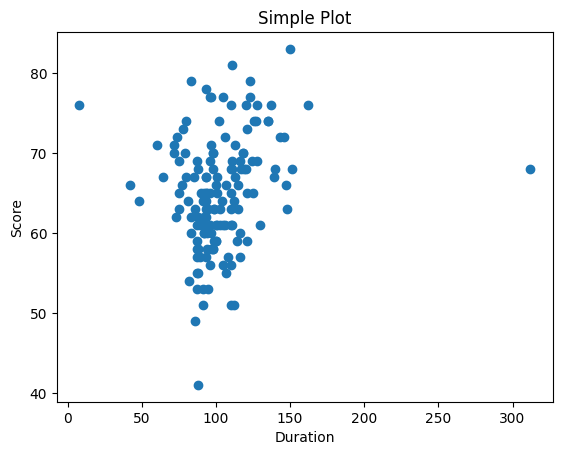

In [37]:
import matplotlib.pyplot as plt

duration = np.array(has_duration_movies["duration"][50:200])
score = np.array(has_duration_movies["score"][50:200])

plt.scatter(duration, score)
plt.xlabel('Duration')
plt.ylabel('Score')
plt.title('Simple Plot')
plt.show()

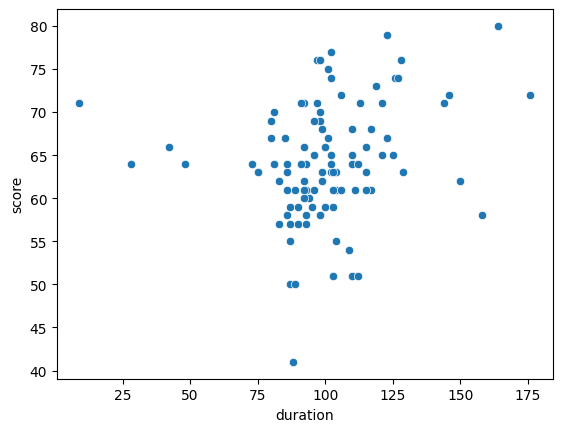

In [38]:
import seaborn as sns
sns.scatterplot(x="duration", y="score", data=has_duration_movies[:100])
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [40]:
iris = load_iris()
X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#Normalisasi Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [41]:
#Evaluasi model
prediction = model.predict(X_test)
print(classification_report(y_test,prediction))
print("Accuracy: ",accuracy_score(y_test,prediction))
print("Confusion Matrix : \n",confusion_matrix(prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy:  0.9777777777777777
Confusion Matrix : 
 [[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]


In [42]:
#TensorFlow dan keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    Dense(32,activation="relu",input_shape=(196,)),
    Dense(10,activation="softmax")
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

c:\Users\viola\anaconda3\envs\opencv-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
X_train = np.random.rand(15000,196)
y_train = np.random.randint(10,size=(15000,))
X_test = np.random.rand(2500,196)
y_test = np.random.randint(10,size=(2500,))

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.1033 - loss: 2.3150
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.1038 - loss: 2.3025
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - accuracy: 0.1043 - loss: 2.3020
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.1141 - loss: 2.3013
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.1056 - loss: 2.2998
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.1146 - loss: 2.2990
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.1119 - loss: 2.2994
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.1089 - loss: 2.2990
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.1138 - loss: 2.2958
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.1181 - loss: 2.2946


In [44]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print(test_loss)
print(f'Akurasi uji: {test_acc}')


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.1074 - loss: 2.3196
2.311519145965576
Akurasi uji: 0.10639999806880951


## Booklet 2

### Linear Regression

In [45]:
#Hipotesis : Apakah durasi memengaruhi meta score film?
#Duration = feature variable, Score = target variable

outlier_highend =has_duration_movies[(has_duration_movies["duration"]>180)].index
outlier_lowend =has_duration_movies[(has_duration_movies["duration"]<50)].index
has_duration_movies.drop(outlier_highend,inplace=True)
has_duration_movies.drop(outlier_lowend,inplace=True)
has_duration_movies.max()

C:\Users\viola\AppData\Local\Temp\ipykernel_21304\1441971693.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies.drop(outlier_highend,inplace=True)
C:\Users\viola\AppData\Local\Temp\ipykernel_21304\1441971693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies.drop(outlier_lowend,inplace=True)


netflix_id                                                   s972
amazon_id                                                    s971
disney_id                                                    s996
en_title                                                 Zootopia
title                                                    Zootopia
orig_lang                                                 Swedish
release_year                                                 2021
duration                                                      179
score                                                        85.0
genre                                            [Western, Drama]
overview        Zendaya and Bella Thorne, who play Rocky and C...
dtype: object

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = has_duration_movies.loc[:,["duration"]].values
y = has_duration_movies.loc[:,"score"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear = LinearRegression()
linear.fit(X_train_scaled,y_train)

LinearRegression()

In [47]:
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_error

prediction = linear.predict(X_test_scaled)

mae = mean_absolute_error(y_test,prediction)
rmse = root_mean_squared_error(y_test,prediction)
mse = np.power(rmse,2)
r2 = r2_score(y_test,prediction)
print("Mean Absolute Error : ",mae)
print("Root Mean Squared Error : ",rmse)
print("Mean Squared Error : ",mse)
print("R2 Score : ",r2)

print("\nCoefficient Regression",linear.coef_)
print("Intercept Value : ",linear.intercept_)

Mean Absolute Error :  6.423599010748676
Root Mean Squared Error :  8.00166277495303
Mean Squared Error :  64.02660716406902
R2 Score :  0.13558982166176836

Coefficient Regression [2.25713132]
Intercept Value :  64.83682469680265


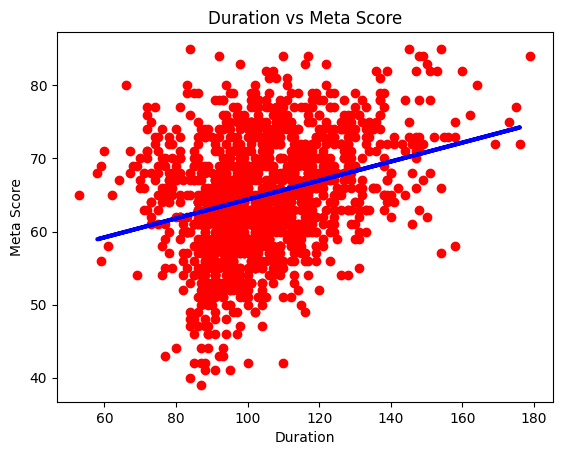

In [48]:
import matplotlib.pyplot as plt

plt.scatter(X,y,color="red")
plt.plot(X_test,prediction,color="blue",linewidth=3)
plt.xlabel("Duration")
plt.ylabel("Meta Score")
plt.title("Duration vs Meta Score")
plt.show()

In [49]:
#Model Usage

test_duration = [[120]] #This is typical movie duration
test_predict = linear.predict(scaler.transform(test_duration))
print("Prediction : ",test_predict)

Prediction :  [66.98402652]


### Decision Tree Regression

In [50]:
#Coba dengan hipotesis yang sama dari linear regresi
from sklearn.tree import DecisionTreeRegressor
X = has_duration_movies.loc[:,["duration"]].values
y = has_duration_movies.loc[:,"score"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

decision = DecisionTreeRegressor(random_state=0)
decision.fit(X_train_scaled,y_train)


DecisionTreeRegressor(random_state=0)

In [51]:
prediction = decision.predict(X_test_scaled)

print("Mean Absolute Error : ", mean_absolute_error(y_test,prediction))
print("Root Mean Squared Error", root_mean_squared_error(y_test,prediction))
print("Mean Squared Error", np.power(root_mean_squared_error(y_test,prediction),2))
print("R2 Score : ", r2_score(y_test,prediction))

Mean Absolute Error :  6.396038752178039
Root Mean Squared Error 8.162471573159984
Mean Squared Error 66.62594218264482
R2 Score :  0.13032186374957366


C:\Users\viola\AppData\Local\Temp\ipykernel_21304\3005802693.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 1)


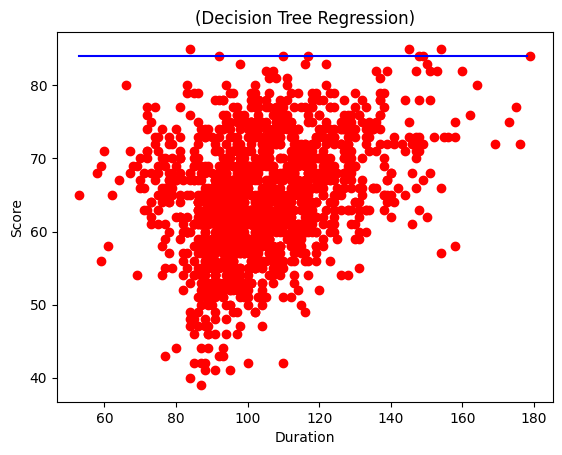

In [52]:
X_grid = np.arange(min(X), max(X), 1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, decision.predict(X_grid), color='blue')
plt.title('(Decision Tree Regression)')
plt.xlabel('Duration')
plt.ylabel('Score')

plt.show()

In [53]:
#Model Usage

test_duration = [[120]]#This is typical movie duration
test_predict = linear.predict(scaler.transform(test_duration))
print("Prediction : ",test_predict)

Prediction :  [66.9130263]


##### Hyperparameter Tuning

In [54]:
#How about try to hyperparamter tuning with gridsearch?
decision.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [55]:
parameters={"max_depth" : [1,3,5,7,9],
            "max_features":range(1,5,2),
            "max_leaf_nodes":[None,10,20,30,40,50,60,70],
           "min_samples_leaf":[1,2,3,4,5,6,7,8],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "splitter":["best","random"],}

from sklearn.model_selection import GridSearchCV

decision_grid = GridSearchCV(decision,param_grid=parameters,scoring="neg_mean_squared_error",cv=3,verbose=3)

decision_grid.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 6400 candidates, totalling 19200 fits
[CV 1/3] END max_depth=1, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-58.276 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-53.862 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-52.957 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-65.063 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-58.756 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitte

c:\Users\viola\anaconda3\envs\opencv-env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7, 9],
                         'max_features': range(1, 5, 2),
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [56]:
decision_grid.best_params_

{'max_depth': 3,
 'max_features': 1,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [57]:
decision_grid.best_score_

np.float64(-51.89997708094857)

In [58]:
decision_grid_tuned = DecisionTreeRegressor(max_depth=3,max_features=1,max_leaf_nodes=None,
                                            min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter="best",
                                            random_state=0)

decision_grid_tuned.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=3, max_features=1, min_weight_fraction_leaf=0.1,
                      random_state=0)

In [59]:
grid_prediction = decision_grid_tuned.predict(X_test_scaled)

print("Mean Absolute Error : ", mean_absolute_error(y_test,grid_prediction))
print("Root Mean Squared Error", root_mean_squared_error(y_test,grid_prediction))
print("Mean Squared Error", np.power(root_mean_squared_error(y_test,grid_prediction),2))
print("R2 Score : ", r2_score(y_test,grid_prediction))

Mean Absolute Error :  6.390828824598683
Root Mean Squared Error 8.113250666547739
Mean Squared Error 65.82483637823732
R2 Score :  0.14077881460223984


C:\Users\viola\AppData\Local\Temp\ipykernel_21304\4149919481.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 1)


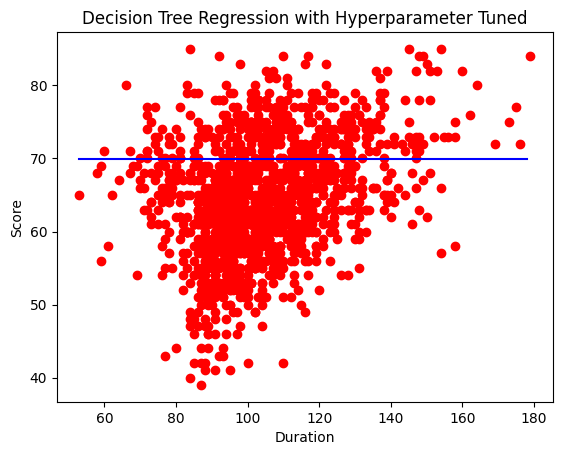

In [60]:
X_grid = np.arange(min(X), max(X), 1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, decision_grid_tuned.predict(X_grid), color='blue')
plt.title('Decision Tree Regression with Hyperparameter Tuned')
plt.xlabel('Duration')
plt.ylabel('Score')

plt.show()

### Classification

#### Data Preparation

In [61]:
#Hypothesis : Can ML figure from how good the user created film based on genres and duration?

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin


In [62]:
#Make an assumption that movies which score is higher than 65 is considered to be good (whether be very good or average at best)
#Otherwise it will be considered bad (not good)

def map_score_evaluation(score):
    if score <= 100 and score>=65:
        return 1 #Good
    else:
        return 0 #Not Good
    
has_duration_movies["score_rate"] = has_duration_movies["score"].apply(map_score_evaluation)
has_duration_movies[["score_rate"]].value_counts()


C:\Users\viola\AppData\Local\Temp\ipykernel_21304\2345205802.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_duration_movies["score_rate"] = has_duration_movies["score"].apply(map_score_evaluation)


score_rate
1             708
0             688
Name: count, dtype: int64

In [63]:
X = has_duration_movies[["genre","duration"]]
y = has_duration_movies["score_rate"]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

has_duration_movies.loc[:,["genre","duration","score_rate"]]

genre  duration  score_rate
2384                            [Comedy, Romance, Drama]        97           1
2385                            [Comedy, Romance, Drama]        98           1
2389                 [Adventure, Action, Drama, Fantasy]       109           0
2393                          [Drama, Adventure, Action]        87           0
2413                                    [Family, Comedy]       104           0
...                                                  ...       ...         ...
23111                  [Crime, Drama, Mystery, Thriller]       158           1
23127                                   [Comedy, Horror]        88           1
23137  [Family, Comedy, Adventure, Action, Science Fi...        88           0
23138                  [Science Fiction, Action, Horror]        87           0
23140             [Animation, Adventure, Family, Comedy]       109           1

[1396 rows x 3 columns]

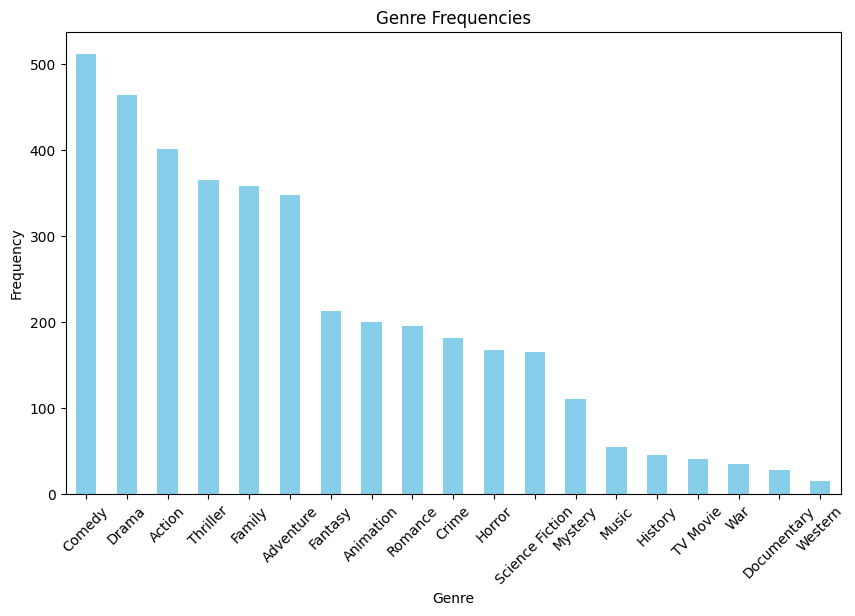

In [64]:
mlb = MultiLabelBinarizer()
genres_transformed = mlb.fit_transform(has_duration_movies['genre'])

# Convert to DataFrame for easier plotting
genres_df = pd.DataFrame(genres_transformed, columns=mlb.classes_)

# Sum up occurrences of each genre
genre_counts = genres_df.sum().sort_values(ascending=False)

# Plot histogram
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Frequencies')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [65]:
class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)

In [ ]:
mlb = MultiLabelBinarizer()

preprocessor = ColumnTransformer(transformers=[
    ("genres",MultiLabelBinarizerTransformer(),"genre"),
    ("duration",StandardScaler(),["duration"])
])


#### Logistic Regression Model

In [67]:
#Method 1 : Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logistic_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",logistic)
])

logistic_pipeline.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('genres',
                                                  MultiLabelBinarizerTransformer(),
                                                  'genre'),
                                                 ('duration', StandardScaler(),
                                                  ['duration'])])),
                ('model', LogisticRegression())])

In [68]:
prediction = logistic_pipeline.predict(X_test)

print("Accuracy Score : ",accuracy_score(y_test,prediction))
print(f'ROC-AUC: {roc_auc_score(y_test, prediction)}')
print("\nClassification Report : \n",classification_report(y_test,prediction))


Accuracy Score :  0.725
ROC-AUC: 0.7232730263157895

Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.74      0.75       152
           1       0.70      0.70      0.70       128

    accuracy                           0.72       280
   macro avg       0.72      0.72      0.72       280
weighted avg       0.73      0.72      0.73       280



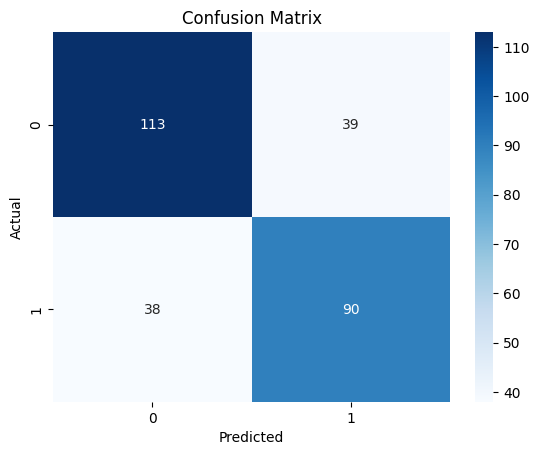

In [69]:
#Confusion Matrix from Logistic Regression
cm = confusion_matrix(y_test, prediction)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### Hyperparamter Tuning

In [70]:
logistic.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid =    {
    'model__C':np.logspace(-4, 4, 20),
    'model__penalty':[ 'elasticnet', 'l1', 'l2'],
    "model__solver":['lbfgs','newton-cg','liblinear','sag','saga'],
    'model__max_iter' : range(100,1000,50)}

logistic_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",logistic)
])

clf = GridSearchCV(logistic_pipeline, param_grid = param_grid, cv = 3, verbose=3, n_jobs=-1,
                   scoring="roc_auc")

clf.fit(X_train,y_train)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


c:\Users\viola\anaconda3\envs\opencv-env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
8640 fits failed out of a total of 16200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\viola\anaconda3\envs\opencv-env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\viola\anaconda3\envs\opencv-env\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\viola\anaconda3\envs\opencv-env\Lib\site-packag

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('genres',
                                                                         MultiLabelBinarizerTransformer(),
                                                                         'genre'),
                                                                        ('duration',
                                                                         StandardScaler(),
                                                                         ['duration'])])),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'model__max_iter': range(100, 1000, 50),
                         'model__penalty': ['elasticnet', 'l1', 'l2'],
                         'model__solver': ['lbfgs', 'newton-cg', 'liblinear',
                                           'sag', 'saga']},
             scoring='roc_auc', verbose=3)

In [72]:
clf.best_params_


{'model__C': np.float64(1.623776739188721),
 'model__max_iter': 950,
 'model__penalty': 'l2',
 'model__solver': 'sag'}

In [73]:
clf.best_score_

np.float64(0.7859559730457303)

In [96]:
best_clf = LogisticRegression(random_state=0,C=np.float64(1.623776739188721),
                              max_iter=950,penalty='l2',solver="sag")

grid_logistic_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",best_clf)
])

grid_logistic_pipeline.fit(X_train,y_train)

clf_prediction = grid_logistic_pipeline.predict(X_test)

print("Accuracy Score : ",accuracy_score(y_test,clf_prediction))
print(f'ROC-AUC: {roc_auc_score(y_test, clf_prediction)}')
print("\nClassification Report : \n",classification_report(y_test,clf_prediction))

Accuracy Score :  0.725
ROC-AUC: 0.7232730263157895

Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.74      0.75       152
           1       0.70      0.70      0.70       128

    accuracy                           0.72       280
   macro avg       0.72      0.72      0.72       280
weighted avg       0.73      0.72      0.73       280



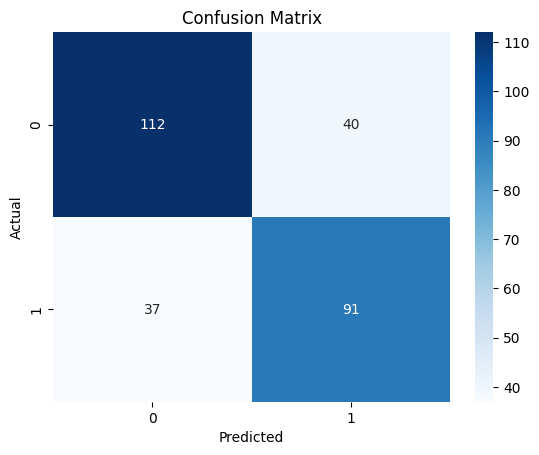

In [75]:
#Confusion Matrix from Logistic Regression
cm = confusion_matrix(y_test, clf_prediction)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### KNN Model

In [76]:
#Metode 2 : KNN
knn = KNeighborsClassifier(n_neighbors=50)

k_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",knn)
])

k_pipeline.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('genres',
                                                  MultiLabelBinarizerTransformer(),
                                                  'genre'),
                                                 ('duration', StandardScaler(),
                                                  ['duration'])])),
                ('model', KNeighborsClassifier(n_neighbors=50))])

In [77]:
prediction = k_pipeline.predict(X_test)

print("Accuracy Score : ",accuracy_score(y_test,prediction))
print("\nClassification Report : \n",classification_report(y_test,prediction))


Accuracy Score :  0.7535714285714286

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       152
           1       0.75      0.70      0.72       128

    accuracy                           0.75       280
   macro avg       0.75      0.75      0.75       280
weighted avg       0.75      0.75      0.75       280



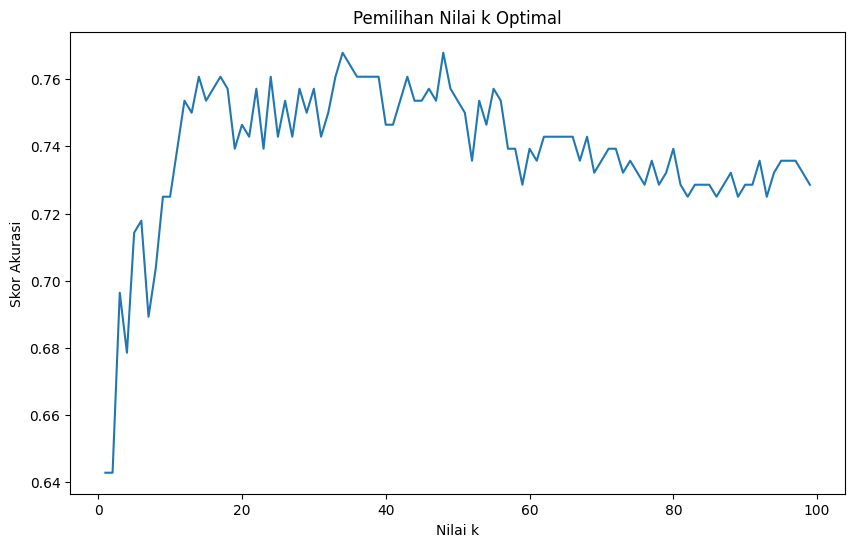

Nilai k optimal: 34


In [78]:
#Cari nilai k paling optimal untuk nilai n_neigbors
k_range = range(1,100)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",knn)
])
    pipeline.fit(X_train,y_train)
    scores.append(pipeline.score(X_test,y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_range, scores)
plt.xlabel('Nilai k')
plt.ylabel('Skor Akurasi')
plt.title('Pemilihan Nilai k Optimal')
plt.show()

k_optimal = k_range[np.argmax(scores)]
print(f'Nilai k optimal: {k_optimal}')

In [79]:
#Coba model training dengan nilai k optimal

knn = KNeighborsClassifier(n_neighbors=k_optimal)

pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",knn)
])

pipeline.fit(X_train,y_train)

prediction = pipeline.predict(X_test)

print("Accuracy Score : ",accuracy_score(y_test,prediction))
print("\nClassification Report : \n",classification_report(y_test,prediction))


Accuracy Score :  0.7678571428571429

Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       152
           1       0.76      0.71      0.74       128

    accuracy                           0.77       280
   macro avg       0.77      0.76      0.76       280
weighted avg       0.77      0.77      0.77       280



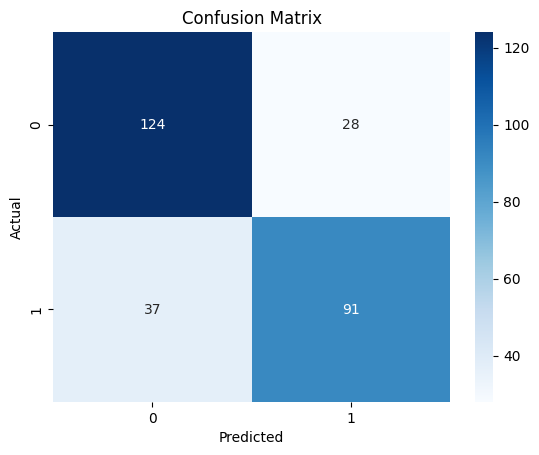

In [80]:
#Confusion Matrix for KNN
cm = confusion_matrix(y_test, prediction)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### Hyperparamter Tuning

In [81]:
knn = KNeighborsClassifier()

knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid =    {
    'model__algorithm' : ["auto","ball_tree","kd_tree","brute"],
    'model__n_neighbors' : range(5,60,3),
    "model__weights" : ["uniform","distance"],
    "model__metric" : ['minkowski','euclidean','manhattan'],
    "model__leaf_size" : range(10,60,5),
    "model__p" : range(1,5)
    }

knn_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",knn)
])

knn_clf = GridSearchCV(knn_pipeline, param_grid = param_grid, cv = 3, verbose=3, n_jobs=-1,
                   scoring="roc_auc")

knn_clf.fit(X_train,y_train)

Fitting 3 folds for each of 18240 candidates, totalling 54720 fits


c:\Users\viola\anaconda3\envs\opencv-env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('genres',
                                                                         MultiLabelBinarizerTransformer(),
                                                                         'genre'),
                                                                        ('duration',
                                                                         StandardScaler(),
                                                                         ['duration'])])),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                              'brute'],
                         'model__leaf_size': range(10, 60, 5),
                         'model__metric': ['minkowski', 'euclidean',
                                           'manhattan'],
                         'model__n_neighbors': range(5, 60, 3),
                         'model__p': range(1, 5),
                         'model__weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=3)

In [83]:
knn_clf.best_params_

{'model__algorithm': 'ball_tree',
 'model__leaf_size': 25,
 'model__metric': 'minkowski',
 'model__n_neighbors': 59,
 'model__p': 3,
 'model__weights': 'uniform'}

In [84]:
knn_clf.best_score_

np.float64(0.7805684699238903)

In [97]:
best_knn = KNeighborsClassifier(algorithm="ball_tree",leaf_size=25,metric="minkowski",
                                n_neighbors=59,p=3,weights="uniform")

grid_knn_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",best_knn)
])

grid_knn_pipeline.fit(X_train,y_train)

knn_clf_prediction = grid_knn_pipeline.predict(X_test)

print("Accuracy Score : ",accuracy_score(y_test,knn_clf_prediction))
print(f'ROC-AUC: {roc_auc_score(y_test, knn_clf_prediction)}')
print("\nClassification Report : \n",classification_report(y_test,knn_clf_prediction))

Accuracy Score :  0.7357142857142858
ROC-AUC: 0.7325246710526316

Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       152
           1       0.72      0.70      0.71       128

    accuracy                           0.74       280
   macro avg       0.73      0.73      0.73       280
weighted avg       0.74      0.74      0.74       280



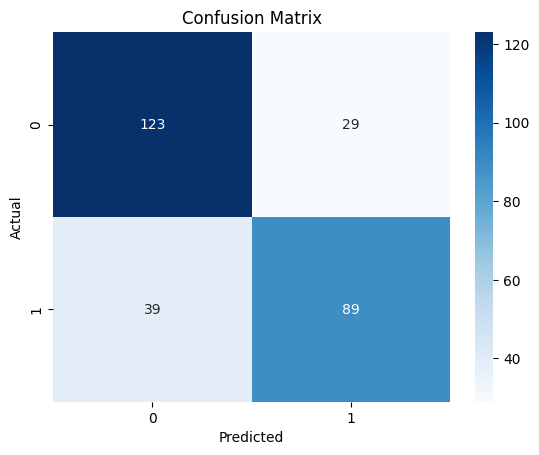

In [86]:
cm = confusion_matrix(y_test, knn_clf_prediction)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Decision Tree Classifier

In [87]:

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion="entropy",random_state=0)
tree_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",classifier)
])
tree_pipeline.fit(X_train,y_train)

prediction = tree_pipeline.predict(X_test)
report = classification_report(y_test,prediction)
acc = accuracy_score(y_test,prediction)

print("Accuracy Score", acc)
print("Classification Report :\n",report)

Accuracy Score 0.65
Classification Report :
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       152
           1       0.62      0.62      0.62       128

    accuracy                           0.65       280
   macro avg       0.65      0.65      0.65       280
weighted avg       0.65      0.65      0.65       280



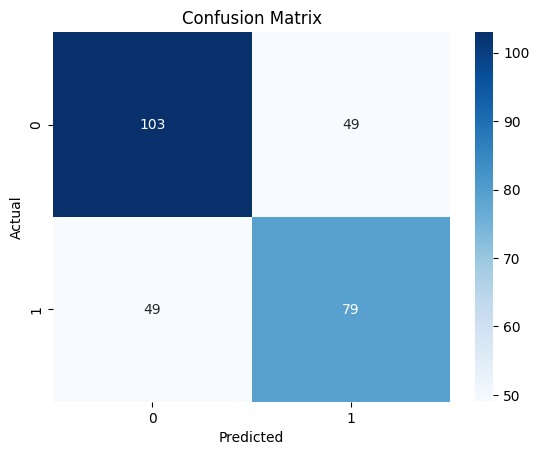

In [88]:
#Confusion Matrix from Decision Tree Classifier
cm = confusion_matrix(y_test, prediction)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##### Hyperparameter Tuning

In [89]:
#How about try to hyperparamter tuning with gridsearch?
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [90]:
parameters={"max_depth" : [1,3,5,7,9],
            "max_features":range(1,10,3),
            "max_leaf_nodes":[None,10,20,30,40,50,60,70],
           "min_samples_leaf":[1,2,3,4,5,6,7,8],
           "min_weight_fraction_leaf": [0.1,0.2,0.3,0.4,0.5],
           "splitter":["best","random"],}

from sklearn.model_selection import GridSearchCV

tree_clf = GridSearchCV(classifier,param_grid=parameters,scoring="neg_mean_squared_error",cv=3,verbose=3)

tree_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",tree_clf)
])
tree_pipeline.fit(X_train,y_train)


Fitting 3 folds for each of 9600 candidates, totalling 28800 fits
[CV 1/3] END max_depth=1, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.478 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.481 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=-0.481 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.478 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random;, score=-0.481 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=1, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=ran

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('genres',
                                                  MultiLabelBinarizerTransformer(),
                                                  'genre'),
                                                 ('duration', StandardScaler(),
                                                  ['duration'])])),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=DecisionTreeClassifier(criterion='entropy',
                                                               random_state=0),
                              param_grid={'max_depth': [1, 3, 5, 7, 9],
                                          'max_features': range(1, 10, 3),
                                          'max_leaf_nodes': [None, 10, 20, 30,
                                                             40, 50, 60, 70],
                                          'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                               7, 8],
                                          'min_weight_fraction_leaf': [0.1, 0.2,
                                                                       0.3, 0.4,
                                                                       0.5],
                                          'splitter': ['best', 'random']},
                              scoring='neg_mean_squared_error', verbose=3))])

In [91]:
tree_clf.best_params_

{'max_depth': 5,
 'max_features': 7,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [92]:
tree_clf.best_score_

np.float64(-0.33512544802867383)

In [93]:
decision_grid_clf = DecisionTreeClassifier(max_depth=5,max_features=7,max_leaf_nodes=10,
                                            min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter="best",
                                            random_state=0)

best_tree_pipeline = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",decision_grid_clf)
])

best_tree_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('genres',
                                                  MultiLabelBinarizerTransformer(),
                                                  'genre'),
                                                 ('duration', StandardScaler(),
                                                  ['duration'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, max_features=7,
                                        max_leaf_nodes=10,
                                        min_weight_fraction_leaf=0.1,
                                        random_state=0))])

In [94]:
clf_prediction = best_tree_pipeline.predict(X_test)

print("Accuracy Score : ",accuracy_score(y_test,clf_prediction))
print(f'ROC-AUC: {roc_auc_score(y_test, clf_prediction)}')
print("\nClassification Report : \n",classification_report(y_test,clf_prediction))

Accuracy Score :  0.7214285714285714
ROC-AUC: 0.7193667763157895

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       152
           1       0.70      0.70      0.70       128

    accuracy                           0.72       280
   macro avg       0.72      0.72      0.72       280
weighted avg       0.72      0.72      0.72       280



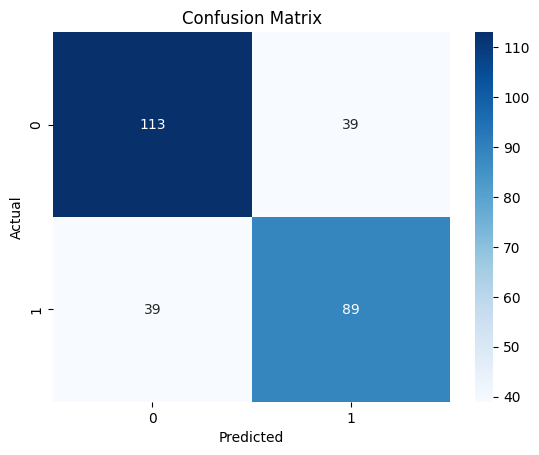

In [95]:
#Confusion Matrix from Decision Tree Classifier
cm = confusion_matrix(y_test, clf_prediction)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Conclusion?

Dari Evaluasi ketiga model yang ada, hasilnya KNN Model lebih optimal dalam hipotesis yang diinginkan terlebih dengan pemilihan parameter dengan range tertentu